In [1]:
import pandas as pd
import re
import nltk
dataset = pd.read_csv('Consumer_Complaints.csv', encoding='ISO-8859-1');

In [2]:
dataset.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,01/19/2017,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,NaN,Consent provided,Web,01/19/2017,Closed with explanation,Yes,No,2296496
2,04/06/2018,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Older American,Consent provided,Web,04/06/2018,Closed with explanation,Yes,NaN,2866101
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


In [3]:
dataset['category_id'] = pd.factorize(dataset['Product'])[0]
category_id_dataset = dataset[['Product', 'category_id'
                     ]].drop_duplicates().sort_values('category_id')
category_to_id_dataset = dict(category_id_dataset.values)
id_dataset_to_category = dict(category_id_dataset[['category_id', 'Product']].values)
dataset.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,category_id
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,0
1,01/19/2017,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,NaN,Consent provided,Web,01/19/2017,Closed with explanation,Yes,No,2296496,1
2,04/06/2018,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Older American,Consent provided,Web,04/06/2018,Closed with explanation,Yes,NaN,2866101,2
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638,3
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760,4


In [4]:
dataset.dropna(subset=["Consumer complaint narrative"], inplace = True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335659 entries, 1 to 1152266
Data columns (total 19 columns):
Date received                   335659 non-null object
Product                         335659 non-null object
Sub-product                     283486 non-null object
Issue                           335659 non-null object
Sub-issue                       228534 non-null object
Consumer complaint narrative    335659 non-null object
Company public response         162153 non-null object
Company                         335659 non-null object
State                           334411 non-null object
ZIP code                        264691 non-null object
Tags                            57989 non-null object
Consumer consent provided?      335659 non-null object
Submitted via                   335659 non-null object
Date sent to company            335659 non-null object
Company response to consumer    335655 non-null object
Timely response?                335659 non-null object
Consumer 

In [6]:
dataset.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'category_id'],
      dtype='object')

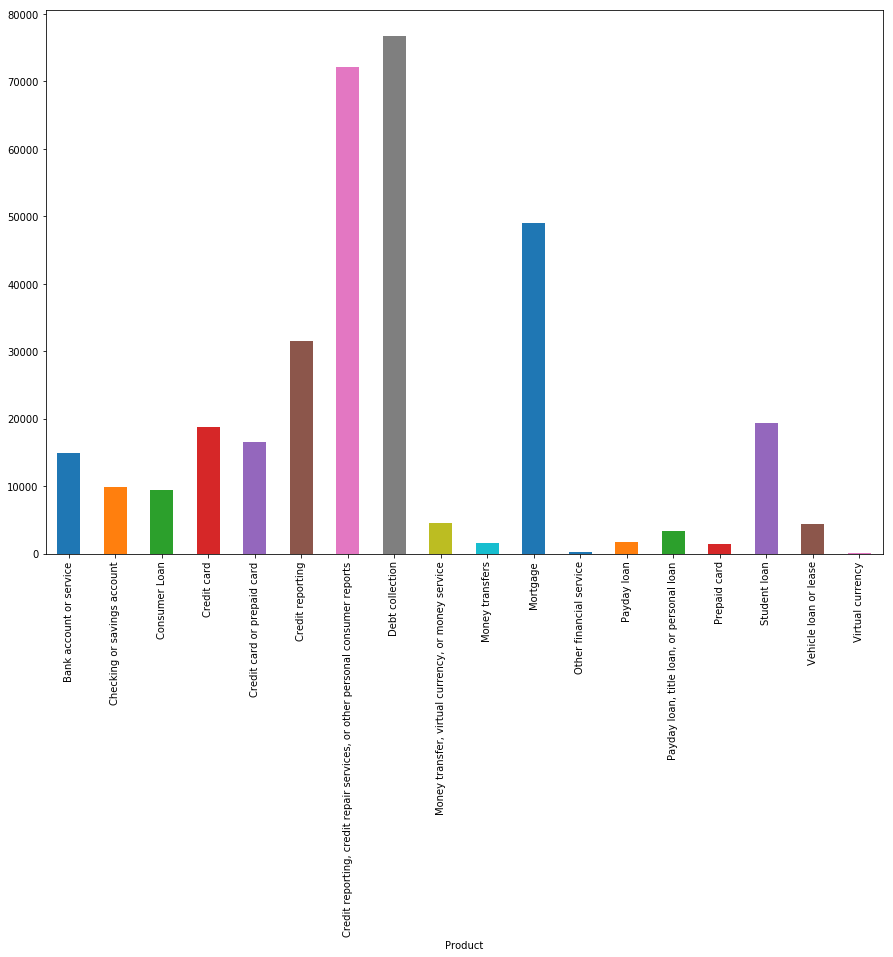

Product
Virtual currency                                                                   16
Other financial service                                                           292
Prepaid card                                                                     1450
Money transfers                                                                  1497
Payday loan                                                                      1747
Payday loan, title loan, or personal loan                                        3335
Vehicle loan or lease                                                            4380
Money transfer, virtual currency, or money service                               4468
Consumer Loan                                                                    9473
Checking or savings account                                                      9826
Bank account or service                                                         14885
Credit card or prepaid card                   

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15,10))
dataset.groupby('Product')["Consumer complaint narrative"].count().plot.bar(ylim=0)
plt.show()
dataset.groupby('Product')["Consumer complaint narrative"].count().sort_values()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

matrix = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

X = matrix.fit_transform(dataset["Consumer complaint narrative"])
y = dataset["category_id"]
X.shape
   

(335659, 655126)

In [9]:
from sklearn.feature_selection import chi2
import numpy as np
top_n = 2
for Product, category_id in sorted(category_to_id_dataset.items()):
    features_chi2 = chi2(X, y == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(matrix.get_feature_names())[indices]
    unigrams = [feature for feature in feature_names if len(feature.split(' ')) == 1][:top_n]
    bigrams = [feature for feature in feature_names if len(feature.split(' ')) == 2][:top_n]
    nl = '\n'
    nl = chr(10)
    print(f"# '{Product}':")
    print(f"  . Most correlated unigrams:{nl}. {'{nl}. '.join(unigrams)}")
    print(f"  . Most correlated bigrams:{nl}. {'{nl}. '.join(bigrams)}")

# 'Bank account or service':
  . Most correlated unigrams:
. dir{nl}. angrily
  . Most correlated bigrams:
. hold week{nl}. live outside
# 'Checking or savings account':
  . Most correlated unigrams:
. tablet{nl}. inexperience
  . Most correlated bigrams:
. xxxx duty{nl}. company advising
# 'Consumer Loan':
  . Most correlated unigrams:
. wont{nl}. siding
  . Most correlated bigrams:
. requested taken{nl}. identity security
# 'Credit card':
  . Most correlated unigrams:
. indicators{nl}. brick
  . Most correlated bigrams:
. finally refunded{nl}. playing catch
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. walkthrough{nl}. scotus
  . Most correlated bigrams:
. day absolutely{nl}. authorized initiated
# 'Credit reporting':
  . Most correlated unigrams:
. aginst{nl}. alabama
  . Most correlated bigrams:
. far failed{nl}. credit borrow
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. unraveling{nl}. waas
  .

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=42),
]

number_of_folds = 3
model_summary = pd.DataFrame(index=range(number_of_folds * len(models)))
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=number_of_folds)
    for fold_id, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_id, accuracy))
model_summary = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy'])
print(model_summary)


                model_name  fold_id  accuracy
0   RandomForestClassifier        0  0.282026
1   RandomForestClassifier        1  0.288332
2   RandomForestClassifier        2  0.283598
3                LinearSVC        0  0.776539
4                LinearSVC        1  0.781552
5                LinearSVC        2  0.780408
6            MultinomialNB        0  0.587833
7            MultinomialNB        1  0.589445
8            MultinomialNB        2  0.589337
9       LogisticRegression        0  0.755983
10      LogisticRegression        1  0.759834
11      LogisticRegression        2  0.755854


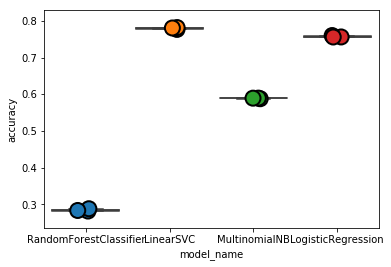

model_name
LinearSVC                 0.779500
LogisticRegression        0.757224
MultinomialNB             0.588871
RandomForestClassifier    0.284652
Name: accuracy, dtype: float64

In [11]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=model_summary)
sns.stripplot(x='model_name', y='accuracy', data=model_summary, 
              size=15, jitter=True, edgecolor="black", linewidth=2)
plt.show()
model_summary.groupby('model_name').accuracy.mean()

In [12]:
##########################################################################

In [13]:
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize as wt 

# nltk.download('stopwords')
# from nltk.corpus import stopwords

# from nltk.stem.porter import PorterStemmer
# from nltk.stem.snowball import SnowballStemmer
# stemmer = SnowballStemmer("english")

# #spell correction
# from autocorrect import spell

# data = []
# dataset["ccn2"] = dataset["Consumer complaint narrative"].apply(
#     lambda x: re.sub('[^A-Za-z]', ' ', x)).str.lower().apply(lambda x: wt(x))

# dataset["ccn2"][:10]
# dataset["ccn5"] = dataset["ccn2"].apply(lambda x: " ".join(x)) 
# data = dataset["ccn5"].tolist()
# dataset["ccn5"][:10]

# # creating the feature matrix 
# from sklearn.feature_extraction.text import CountVectorizer
# matrix = CountVectorizer(min_df=5, encoding='latin-1', ngram_range=(1, 2), stop_words='english')
# X = matrix.fit_transform(data)
# y = dataset["category_id"]

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import LinearSVC

# from sklearn.model_selection import cross_val_score

# models = [
#     RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0),
#     LinearSVC(),
#     MultinomialNB(),
#     LogisticRegression(random_state=0),
# ]

# number_of_folds = 3
# model_summary = pd.DataFrame(index=range(number_of_folds * len(models)))
# entries = []

# for model in models:
#     model_name = model.__class__.__name__
#     accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=number_of_folds)
#     for fold_id, accuracy in enumerate(accuracies):
#         entries.append((model_name, fold_id, accuracy))
# model_summary = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy'])
# print(model_summary)

# import seaborn as sns
# sns.boxplot(x='model_name', y='accuracy', data=model_summary)
# sns.stripplot(x='model_name', y='accuracy', data=model_summary, 
#               size=8, jitter=True, edgecolor="black", linewidth=2)
# plt.show()

In [14]:
model_summary.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.779500
LogisticRegression        0.757224
MultinomialNB             0.588871
RandomForestClassifier    0.284652
Name: accuracy, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, dataset.index, test_size=0.20, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Text(114,0.5,'Actual')

Text(0.5,69,'Predicted')

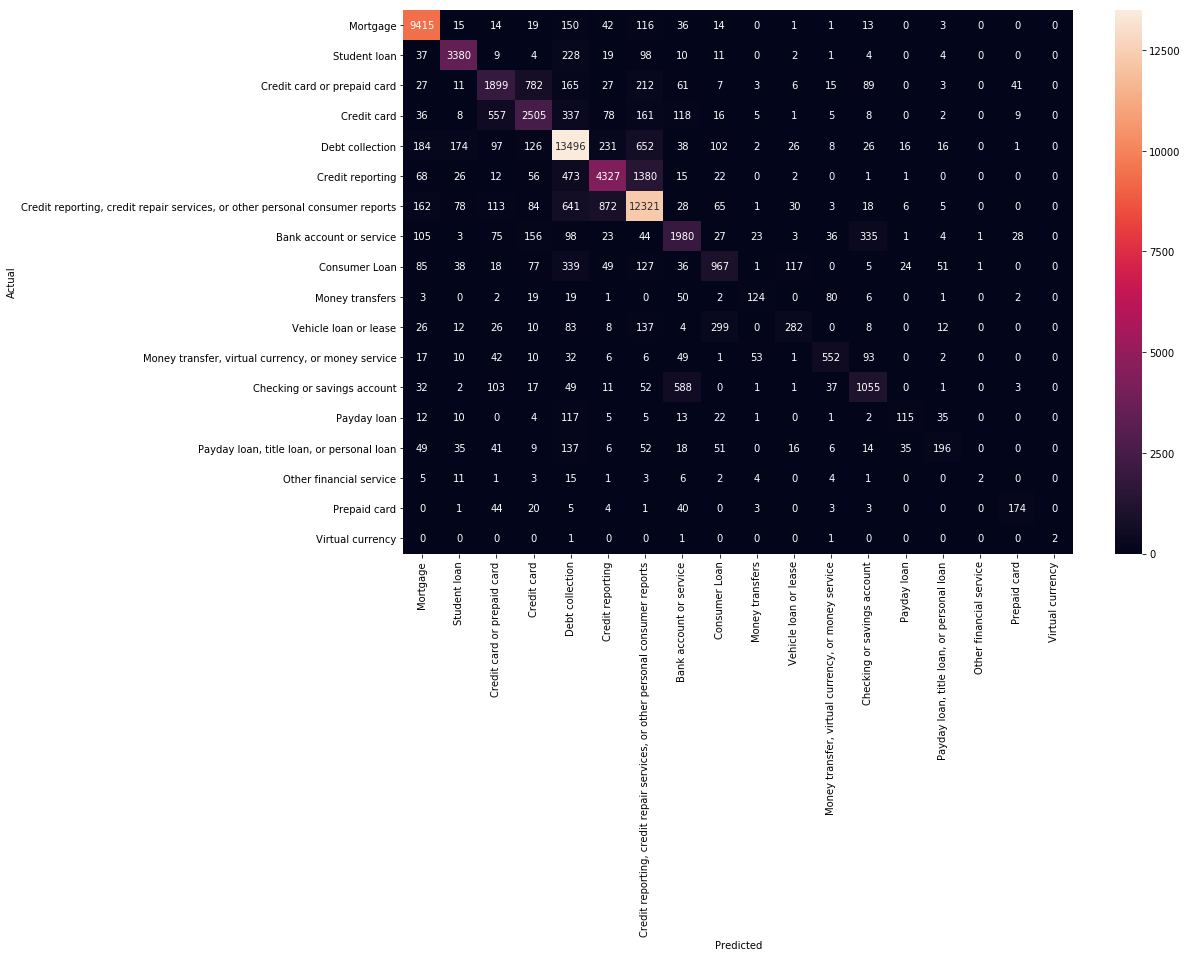

In [16]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_dataset.Product.values, yticklabels=category_id_dataset.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [17]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=dataset['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                                Student loan       0.92      0.96      0.94      9839
                                                 Credit card or prepaid card       0.89      0.89      0.89      3807
                                                                    Mortgage       0.62      0.57      0.59      3348
                                                            Credit reporting       0.64      0.65      0.65      3846
Credit reporting, credit repair services, or other personal consumer reports       0.82      0.89      0.85     15195
                                                             Debt collection       0.76      0.68      0.72      6383
                                                       Vehicle loan or lease       0.80      0.85      0.83     14427
                          Money transfer, virtual curre

In [18]:
# from sklearn.pipeline import Pipeline
# from sklearn.svm import LinearSVC
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler

# SVCpipe = Pipeline([('scale', StandardScaler()),
#                    ('SVC',LinearSVC())])

# # Gridsearch to determine the value of C
# param_grid = {'SVC__C':np.arange(0.01,100,10)}
# linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)
# linearSVC.fit(X_train,y_train, with_mean=False)
# print(linearSVC.best_params_)


# bestlinearSVC = linearSVC.best_estimator_
# bestlinearSVC.fit(X_train,y_train)
# bestlinearSVC.coef_ = bestlinearSVC.named_steps['SVC'].coef_
# bestlinearSVC.score(X_train,y_train)

In [19]:
# param_grid = {'C':[1,10],'gamma':[1,0.1]}
# grid = GridSearchCV(LinearSVC(),param_grid,refit = True, verbose=2)
# grid.fit(X_train,y_train)

In [ ]:
# from sklearn import svm, grid_search
# Cs = [0.1, 1, 10]
# gammas = [0.1, 1]
# param_grid = {'C': Cs, 'gamma' : gammas}
# grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=5)
# grid_search.fit(X, y)
# grid_search.best_params_


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn import preprocessing
X = preprocessing.scale(X, with_mean=False)

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1],
                     'C': [0.1]},
                    {'kernel': ['sigmoid'], 'gamma': [0.1],
                     'C': [0.1]},
                    {'kernel': ['linear'], 'C': [0.1]}
                   ]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=3,
                       scoring='%s_macro' % score)
    clf.fit(X, y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

# Tuning hyper-parameters for precision



In [ ]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")